## 야후 파이낸스로 주식시세 구하기
  ### 야후 파이낸스에서 제공하는 삼성전자와 마이크로소프트 주식 시세를 데이터프레임으로 받아 분석
   * 야후 파이낸스는 pip install yfinance로 설치
   * 팬더스-데이터리더 라이브러리 pip installpandas-datareader로 설치
   * 주식 시세를 구하기 위해서는 get_data_yahoo() 함수 사용
    - get_data_yahoo(조회할 주식,start=조회기간시작일, end=조회기간의 종료일)
    - 조회할 주식은 문자열이나, 리스트
    - 조회 기간은 생략할 수 있다.
    - 코스피종목을 조회하려면 6자리 종목코드 뒤에 .KS  
    - 코스닥종목을 조회하려면 종목코드 뒤에 .KQ
    - 미국기업 주식종목을 조회하려면 심볼(티커)를 사용하여 조회한다. 

In [1]:
from pandas_datareader import data as pdr
import yfinance as yf
yf.pdr_override()
import matplotlib.pyplot as plt

In [9]:
sec = pdr.get_data_yahoo('005930.KS',start='2019-01-01')  # 삼성주식
msft = pdr.get_data_yahoo('MSFT',start='2019-01-01') # 마이크로 소프트 주식

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [10]:
sec.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2019-01-02,39400.0,39400.0,38550.0,38750.0,38750.0,7847664
2019-01-03,38300.0,38550.0,37450.0,37600.0,37600.0,12471493
2019-01-04,37450.0,37600.0,36850.0,37450.0,37450.0,14108958
2019-01-07,38000.0,38900.0,37800.0,38750.0,38750.0,12748997
2019-01-08,38000.0,39200.0,37950.0,38100.0,38100.0,12756554


In [11]:
msft.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2018-12-31,101.290001,102.400002,100.440002,101.570000,99.300156,33173800
2019-01-02,99.550003,101.750000,98.940002,101.120003,98.860214,35329300
2019-01-03,100.099998,100.190002,97.199997,97.400002,95.223351,42579100
2019-01-04,99.720001,102.510002,98.930000,101.930000,99.652115,44060600
2019-01-07,101.639999,103.269997,100.980003,102.059998,99.779205,35656100


##### 변수설명
* Open : 시가. 매일 열리는 주식 시장의 첫 시작 가격
* High : 고가. 가장 높은 금액으로 거래
* Low : 저가. 가장 낮은 금액으로 거래
* Close : 종가. 하루 열린 장에서 가장 마지막으로 거래가 완료된 가격을 종가
* Adj Close : 수정종가. 주식가격에 변동이 있을 경우 가격 변동 이전에 거래된 가격을 현재 주식에 맞춰 수정하여 표시한 가격
* Volume : 거래량. 매매된 주식의 수량

In [18]:
sec.index

DatetimeIndex(['2019-01-02', '2019-01-03', '2019-01-04', '2019-01-07',
               '2019-01-08', '2019-01-09', '2019-01-10', '2019-01-11',
               '2019-01-14', '2019-01-15',
               ...
               '2020-09-14', '2020-09-15', '2020-09-16', '2020-09-17',
               '2020-09-18', '2020-09-21', '2020-09-22', '2020-09-23',
               '2020-09-24', '2020-09-25'],
              dtype='datetime64[ns]', name='Date', length=430, freq=None)

In [19]:
msft.index

DatetimeIndex(['2018-12-31', '2019-01-02', '2019-01-03', '2019-01-04',
               '2019-01-07', '2019-01-08', '2019-01-09', '2019-01-10',
               '2019-01-11', '2019-01-14',
               ...
               '2020-09-14', '2020-09-15', '2020-09-16', '2020-09-17',
               '2020-09-18', '2020-09-21', '2020-09-22', '2020-09-23',
               '2020-09-24', '2020-09-25'],
              dtype='datetime64[ns]', name='Date', length=439, freq=None)

삼성전자(sec)와 마이크로소프트(msft)는 인덱스가 dataime형으로 되어 있다. 

In [16]:
sec.columns

Index(['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')

### 삼성전자와 마이크로소프트 종가 데이터를 이용한 그래프 

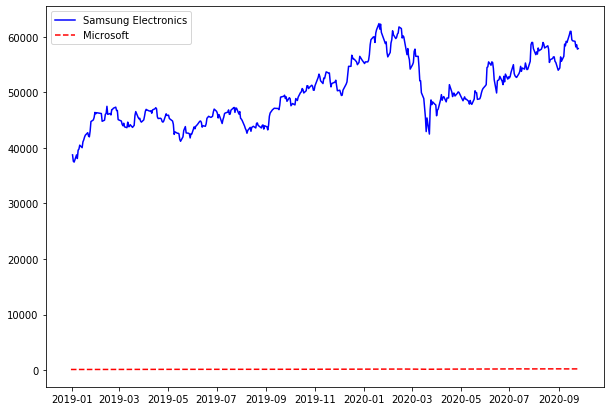

In [28]:
plt.figure(figsize=(10,7))
plt.plot(sec.index,sec['Close'],'b',label='Samsung Electronics')
plt.plot(msft.index,msft.Close,'r--',label='Microsoft')
plt.legend(loc='best')
plt.show()

##### 그래프설명
 - 삼성전자는 50000원 대 , 마이크로소프트는 130달러 대의 주가이기 때문에 숫자 차이가 커서 마이크로소프트 주가가 0인것 처럼 보인다.
 - 비교가 어렵기 때문에 일간변동률을 이용해 비교해 본다.
<br/>
<br/>


##### 코드 설명
* x 축에는 인덱스(날짜), y축에는 Close(종가)데이터.
* plt.legend(loc='best')   ->  라벨 표가 적당히 빈 자리에 위치

### 일간변동률로 삼성전자와 마이크로소프트 주가 비교하기

일간 변동률 = (오늘종가-어제종가)/어제종가 *100

In [29]:
sec['Close']

Date
2019-01-02    38750.0
2019-01-03    37600.0
2019-01-04    37450.0
2019-01-07    38750.0
2019-01-08    38100.0
               ...   
2020-09-21    59200.0
2020-09-22    58200.0
2020-09-23    58600.0
2020-09-24    57800.0
2020-09-25    57900.0
Name: Close, Length: 430, dtype: float64